In [5]:
from google.colab import drive
drive.mount('/content/drive')
!ls drive/MyDrive/metamorphosis.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ls: cannot access 'drive/MyDrive/metamorphosis.txt': No such file or directory


In [6]:
!ls drive/MyDrive

 archive
 Certificate_Saaransh_PerroAyuda.pdf
"Coder's Club.gform"
'Coder'\''s Club (Responses).gsheet'
'Colab Notebooks'
'cpo-qiqv-adc - Aug 16, 2022.gjam'
'cxb-xfzc-wyi - Sep 30, 2022 (1).gjam'
'cxb-xfzc-wyi - Sep 30, 2022.gjam'
 data.csv
'Khushi(00919810705835)_20220626121636.mp3'
 metamorphosis_clean.txt
'otq-doow-zgi - Sep 22, 2022.gjam'
 Resume.gdoc
'Saaransh acknowledgement (1).pdf'
'Saaransh Shandhilya - Internship Experience Letter.pdf'
'Saaransh_Shandilya_Resume_ (2).pdf'
 Saaransh_Shandilya_Resume.pdf
 voice_videos.zip
 Wilyer_Saaransh.pdf


In [7]:
pip install tensorflow

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np


In [9]:
file  = open('drive/My Drive/metamorphosis_clean.txt', 'r', encoding = "utf-8")
print(file)

<_io.TextIOWrapper name='drive/My Drive/metamorphosis_clean.txt' mode='r' encoding='utf-8'>


In [10]:
lines = []
for i in file:
  lines.append(i)

print(lines)

['\ufeffOne morning, when Gregor Samsa woke from troubled dreams, he found\n', 'himself transformed in his bed into a horrible vermin.  He lay on\n', 'his armour-like back, and if he lifted his head a little he could\n', 'see his brown belly, slightly domed and divided by arches into stiff\n', 'sections.  The bedding was hardly able to cover it and seemed ready\n', 'to slide off any moment.  His many legs, pitifully thin compared\n', 'with the size of the rest of him, waved about helplessly as he\n', 'looked.\n', '\n', '"What\'s happened to me?" he thought.  It wasn\'t a dream.  His room,\n', 'a proper human room although a little too small, lay peacefully\n', 'between its four familiar walls.  A collection of textile samples\n', 'lay spread out on the table - Samsa was a travelling salesman - and\n', 'above it there hung a picture that he had recently cut out of an\n', 'illustrated magazine and housed in a nice, gilded frame.  It showed\n', 'a lady fitted out with a fur hat and fur bo

In [11]:
# data cleaning

data = ""

for i in lines:
    data = ' '. join(lines)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
print(data)

One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.  His many legs, pitifully thin compared with the size of the rest of him, waved about helplessly as he looked.  "What's happened to me?" he thought.  It wasn't a dream.  His room, a proper human room although a little too small, lay peacefully between its four familiar walls.  A collection of textile samples lay spread out on the table - Samsa was a travelling salesman - and above it there hung a picture that he had recently cut out of an illustrated magazine and housed in a nice, gilded frame.  It showed a lady fitted out with a fur hat and fur boa who sat upright, raising a heavy fur muff that covered the whole of her lower arm t

In [12]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

print(new_data)

One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he thought   It wasn t a dream   His room  a proper human room although a little too small  lay peacefully between its four familiar walls   A collection of textile samples lay spread out on the table   Samsa was a travelling salesman   and above it there hung a picture that he had recently cut out of an illustrated magazine and housed in a nice  gilded frame   It showed a lady fitted out with a fur hat and fur boa who sat upright  raising a heavy fur muff that covered the whole of her lower arm t

In [13]:
unique_data = []

for i in data.split():
  if i not in unique_data:
    unique_data.append(i)

data = ' '.join(unique_data)

print(data)

One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What's happened me?" thought. It wasn't dream. room, proper human room although too small, peacefully between its four familiar walls. A collection textile samples spread out table - travelling salesman above there hung picture that had recently cut an illustrated magazine housed nice, gilded frame. showed lady fitted fur hat boa who sat upright, raising heavy muff covered whole her lower arm towards viewer. then turned look window at dull weather. Drops rain be heard hitting pane, which made him feel quite sad. "How I sleep bit longer forget all this nonsense", thought

In [14]:
#Tokenising

tokenizer = Tokenizer()
print(tokenizer.fit_on_texts([data]))

sequence_data = tokenizer.texts_to_sequences([data])[0]
print(sequence_data)

None
[17, 53, 293, 2, 18, 729, 135, 730, 294, 8, 731, 19, 732, 9, 295, 54, 733, 296, 297, 734, 8, 735, 29, 736, 30, 55, 20, 56, 737, 136, 57, 298, 137, 738, 138, 299, 739, 740, 300, 741, 301, 742, 58, 743, 31, 302, 744, 59, 745, 4, 303, 304, 746, 305, 747, 60, 295, 748, 139, 749, 750, 751, 140, 58, 752, 141, 306, 21, 753, 142, 754, 143, 144, 61, 62, 63, 145, 4, 755, 307, 32, 756, 308, 32, 146, 33, 309, 310, 757, 758, 759, 760, 147, 296, 761, 762, 763, 764, 10, 64, 148, 765, 766, 22, 767, 311, 5, 65, 768, 769, 312, 770, 771, 772, 149, 773, 313, 774, 314, 775, 315, 316, 776, 150, 777, 66, 778, 779, 780, 781, 317, 67, 782, 318, 783, 784, 6, 319, 68, 151, 152, 785, 320, 321, 786, 34, 153, 787, 322, 323, 788, 21, 324, 789, 325, 154, 326, 155, 790, 156, 791, 23, 11, 792, 145, 35, 69, 793, 70, 157, 794, 795, 71, 158, 159, 796, 327, 160, 72, 73, 797, 328, 798, 799, 55, 161, 31, 800, 801, 802, 803, 162, 329, 163, 12, 804, 805, 330, 331, 332, 806, 74, 807, 808, 13, 75, 36, 76, 809, 810, 37, 811,

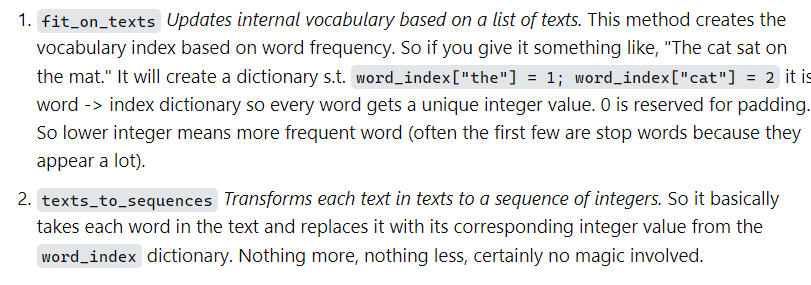

In [15]:
print(tokenizer.word_index)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

{'now': 1, 'gregor': 2, 'well': 3, 'it': 4, 'that': 5, 'then': 6, 'father': 7, 'he': 8, 'in': 9, 'out': 10, 'this': 11, 'so': 12, 'before': 13, 'no': 14, 'mother': 15, 'grete': 16, 'one': 17, 'samsa': 18, 'himself': 19, 'and': 20, 'him': 21, 'there': 22, 'all': 23, 'you': 24, 'yes': 25, 'again': 26, 'work': 27, 'here': 28, 'on': 29, 'like': 30, 'was': 31, 'room': 32, 'too': 33, 'be': 34, 'but': 35, 'god': 36, 'is': 37, 'soon': 38, 'enough': 39, 'would': 40, 'seven': 41, 'did': 42, 'come': 43, 'round': 44, 'door': 45, 'while': 46, 'said': 47, 'already': 48, 'will': 49, 'help': 50, 'we': 51, 'anyway': 52, 'morning': 53, 'bed': 54, 'back': 55, 'if': 56, 'little': 57, 'the': 58, 'to': 59, 'moment': 60, "what's": 61, 'happened': 62, 'me': 63, 'table': 64, 'had': 65, 'upright': 66, 'her': 67, 'look': 68, 'something': 69, 'do': 70, 'right': 71, 'however': 72, 'hard': 73, 'pain': 74, 'oh': 75, 'what': 76, 'business': 77, 'more': 78, 'home': 79, 'train': 80, 'time': 81, 'know': 82, 'them': 83, 

In [16]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]  #splitting and predicting next words
    sequences.append(words)

sequences = np.array(sequences)

print(sequences)

[[  17   53]
 [  53  293]
 [ 293    2]
 ...
 [2615  294]
 [ 294  591]
 [ 591 2616]]


In [17]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])

X = np.array(X) #Previous words
y = np.array(y) #next words

print(X,y)

[  17   53  293 ... 2615  294  591] [  53  293    2 ...  294  591 2616]


In [18]:
y = to_categorical(y, num_classes=vocab_size)
print(y)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [20]:
#model creation

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             26170     
                                                                 
 lstm (LSTM)                 (None, 1, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 2617)              2619617   
                                                                 
Total params: 15694787 (59.87 MB)
Trainable params: 15694787 (59.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [22]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))

In [24]:
model.fit(X, y, epochs=150, batch_size=64                   )

Epoch 1/150
61/61 [==============================] - 26s 343ms/step - loss: 7.8750
Epoch 2/150
61/61 [==============================] - 19s 311ms/step - loss: 7.8601
Epoch 3/150
61/61 [==============================] - 19s 316ms/step - loss: 7.8229
Epoch 4/150
61/61 [==============================] - 21s 340ms/step - loss: 7.6548
Epoch 5/150
61/61 [==============================] - 32s 524ms/step - loss: 7.4513
Epoch 6/150
61/61 [==============================] - 19s 312ms/step - loss: 7.2939
Epoch 7/150
61/61 [==============================] - 18s 300ms/step - loss: 7.1683
Epoch 8/150
61/61 [==============================] - 20s 327ms/step - loss: 7.0575
Epoch 9/150
61/61 [==============================] - 19s 310ms/step - loss: 6.9020
Epoch 10/150
61/61 [==============================] - 19s 313ms/step - loss: 6.6541
Epoch 11/150
61/61 [==============================] - 20s 323ms/step - loss: 6.3859
Epoch 12/150
61/61 [==============================] - 18s 301ms/step - loss: 6.1701
E

In [56]:
def pred_model(text):

    sequence = tokenizer.texts_to_sequences([text])[0]
    sequence = np.array(sequence)
    preds = model.predict(sequence)
    preds = np.argmax(preds)
    predicted_word = ""

    for key, value in tokenizer.word_index.items():
      if value == preds:
        predicted_word = key
        break

    print(predicted_word)

In [58]:
pred_model("here")

1/1 [==============================] - 0s 27ms/step
now
